In [6]:
import pandas as pd
import numpy as np
ERP_ID = 123456
df=pd.read_csv("train1.csv")
df.head()

,id,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,...,ps_calc_20_bin,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,1158448,1.0,1.0,0.0,7.0,1.0,1.0,0,1.0,10,...,0,0,4.136926,3,0.777766,25,0.165477,3.010493,16,0
1,341018,2.0,1.0,0.0,7.0,1.0,NaN,0,NaN,11,...,0,0,0.592341,3,0.770527,1,0.592340,3.036803,16,0
2,699143,2.0,0.0,0.0,4.0,1.0,NaN,0,1.0,1,...,0,0,0.950207,6,0.757445,4,0.237552,2.536030,16,0
3,744070,1.0,1.0,0.0,3.0,1.0,NaN,2,NaN,1,...,1,0,2.013771,5,NaN,4,0.503442,3.251724,15,0
4,639390,2.0,0.0,0.0,11.0,1.0,NaN,2,NaN,11,...,0,0,0.000000,3,0.767450,0,793360.881100,2.703617,18,1


In [7]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
                 id  ps_ind_02_cat  ps_ind_04_cat  ps_ind_05_cat  \
count  2.962090e+05  296084.000000  296164.000000  293294.000000   
mean   7.428426e+05       1.361401       0.416675       0.423841   
std    4.297571e+05       0.664222       0.493009       1.357239   
min    7.000000e+00       1.000000       0.000000       0.000000   
25%    3.699010e+05       1.000000       0.000000       0.000000   
50%    7.424040e+05       1.000000       0.000000       0.000000   
75%    1.114794e+06       2.000000       1.000000       0.000000   
max    1.488017e+06       4.000000       1.000000       6.000000   

       ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  ps_car_04_cat  \
count  296152.000000  296206.000000   91620.000000  296209.000000   
mean        8.298404       0.829507       0.601997       0.727814   
std         2.507128       0.376066       0.489489       2.155780   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000    

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296209 entries, 0 to 296208
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              296209 non-null  int64  
 1   ps_ind_02_cat   296084 non-null  float64
 2   ps_ind_04_cat   296164 non-null  float64
 3   ps_ind_05_cat   293294 non-null  float64
 4   ps_car_01_cat   296152 non-null  float64
 5   ps_car_02_cat   296206 non-null  float64
 6   ps_car_03_cat   91620 non-null   float64
 7   ps_car_04_cat   296209 non-null  int64  
 8   ps_car_05_cat   163922 non-null  float64
 9   ps_car_06_cat   296209 non-null  int64  
 10  ps_car_07_cat   290426 non-null  float64
 11  ps_car_08_cat   296209 non-null  int64  
 12  ps_car_09_cat   295921 non-null  float64
 13  ps_car_10_cat   296209 non-null  int64  
 14  ps_car_11_cat   296209 non-null  int64  
 15  ps_ind_01       296209 non-null  int64  
 16  ps_ind_03       296209 non-null  int64  
 17  ps_ind_06_

In [9]:
# checking balance of data 

if 'target' in df.columns:
    target_col = 'target'
elif 'label' in df.columns:
    target_col = 'label'
else:
    target_col = df.columns[-1]  # Assume last column

print("\n" + "-"*80)
print(f"Target Column: '{target_col}'")
print("Target Distribution:")
print(df[target_col].value_counts())
print(f"\nClass Balance:")
print(df[target_col].value_counts(normalize=True))


# above data exploration is finished


--------------------------------------------------------------------------------
Target Column: 'target'
Target Distribution:
target
0    281023
1     15186
Name: count, dtype: int64

Class Balance:
target
0    0.948732
1    0.051268
Name: proportion, dtype: float64


In [10]:
# checking missing values

print("\n=== Missing Value Percentages ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)


=== Missing Value Percentages ===
           Column  Missing_Count  Missing_Percentage
6   ps_car_03_cat         204589           69.069137
8   ps_car_05_cat         132287           44.660020
32      ps_reg_03          53579           18.088242
61       feature4          53579           18.088242
36      ps_car_14          21108            7.126050
10  ps_car_07_cat           5783            1.952338
3   ps_ind_05_cat           2915            0.984102
12  ps_car_09_cat            288            0.097229
1   ps_ind_02_cat            125            0.042200
4   ps_car_01_cat             57            0.019243
2   ps_ind_04_cat             45            0.015192
33      ps_car_11              4            0.001350
5   ps_car_02_cat              3            0.001013
34      ps_car_12              1            0.000338


In [11]:
# dropping missing columns with high % missing values
cols_to_drop = ['id', 'feature1', 'feature7']
df = df.drop(columns=cols_to_drop, errors='ignore')

high_missing = ['ps_car_03_cat', 'ps_car_05_cat']
df = df.drop(columns=high_missing, errors='ignore')
print("Dropped columns:", cols_to_drop)
print("Dropped columns:", high_missing)


Dropped columns: ['id', 'feature1', 'feature7']
Dropped columns: ['ps_car_03_cat', 'ps_car_05_cat']


In [12]:
# again checking missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

           Column  Missing_Count  Missing_Percentage
57       feature4          53579           18.088242
29      ps_reg_03          53579           18.088242
33      ps_car_14          21108            7.126050
7   ps_car_07_cat           5783            1.952338
2   ps_ind_05_cat           2915            0.984102
9   ps_car_09_cat            288            0.097229
0   ps_ind_02_cat            125            0.042200
3   ps_car_01_cat             57            0.019243
1   ps_ind_04_cat             45            0.015192
30      ps_car_11              4            0.001350
4   ps_car_02_cat              3            0.001013
31      ps_car_12              1            0.000338


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
 
# 1️⃣ Separate columns by type
cat_cols = [col for col in df.columns if '_cat' in col]
bin_cols = [col for col in df.columns if '_bin' in col]
num_cols = [col for col in df.columns if col not in cat_cols and col not in bin_cols and col.lower() != 'target']
target_col = [col for col in df.columns if 'target' in col.lower()]

 

# 2️⃣ Impute missing values
cat_imputer = SimpleImputer(strategy='most_frequent')
bin_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')



# Apply imputers (skip target column)
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
df[bin_cols] = bin_imputer.fit_transform(df[bin_cols])
df[num_cols] = num_imputer.fit_transform(df[num_cols])

print("🧩 Missing values after imputation:", df.isnull().sum().sum())

# 3️⃣ Encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = pd.DataFrame(
    encoder.fit_transform(df[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=df.index
)

# 4️⃣ Merge encoded, numeric, binary, and target columns
X_train_final = pd.concat(
    [encoded_train, df[num_cols], df[bin_cols], df[target_col]],
    axis=1
)

# 🧩 Final check
print("✅ Missing values in final X:", X_train_final.isnull().sum().sum())
print("✅ Final shape:", X_train_final.shape)

# 5️⃣ Optional: Split into X and y

# X2 and y2 are for encoding data
X2 = X_train_final.drop(columns=target_col)
y2= X_train_final[target_col[0]]

print(f"X shape: {X2.shape}")
print(f"y shape: {y2.shape}")


🧩 Missing values after imputation: 0
✅ Missing values in final X: 0
✅ Final shape: (296209, 221)
X shape: (296209, 220)
y shape: (296209,)


In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=target_col)
y= df[target_col[0]]

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=ERP_ID,
    stratify=y  # Maintain class distribution
)

In [17]:
print(f"\nOriginal Dataset: {X.shape[0]} samples")
print(f"Training Set: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Validation Set: {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]*100:.1f}%)")

print(f"\nFeatures: {X_train.shape[1]}")

print("\n" + "-"*80)
print("Class Distribution in Training Set:")
print(pd.Series(y_train).value_counts())
print(pd.Series(y_train).value_counts(normalize=True))

print("\n" + "-"*80)
print("Class Distribution in Validation Set:")
print(pd.Series(y_val).value_counts())
print(pd.Series(y_val).value_counts(normalize=True))

print(f"\n✓ Train-validation split complete!")
print(f"✓ Random state: {ERP_ID} (your ERP ID)")


Original Dataset: 296209 samples
Training Set: 207346 samples (70.0%)
Validation Set: 88863 samples (30.0%)

Features: 61

--------------------------------------------------------------------------------
Class Distribution in Training Set:
target
0    196716
1     10630
Name: count, dtype: int64
target
0    0.948733
1    0.051267
Name: proportion, dtype: float64

--------------------------------------------------------------------------------
Class Distribution in Validation Set:
target
0    84307
1     4556
Name: count, dtype: int64
target
0    0.94873
1    0.05127
Name: proportion, dtype: float64

✓ Train-validation split complete!
✓ Random state: 123456 (your ERP ID)


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score

 
baseline_dt = DecisionTreeClassifier(random_state=ERP_ID)

# Train the model
print("\nTraining baseline model...")
baseline_dt.fit(X_train, y_train)


Training baseline model...


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123456
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_train_pred = baseline_dt.predict(X_train)
y_val_pred = baseline_dt.predict(X_val)

# For AUROC, we need probability scores
y_train_proba = baseline_dt.predict_proba(X_train)[:, 1]
y_val_proba = baseline_dt.predict_proba(X_val)[:, 1]

# Calculate metrics
train_auroc = roc_auc_score(y_train, y_train_proba)
val_auroc = roc_auc_score(y_val, y_val_proba)
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

In [20]:
print("BASELINE RESULTS")
print("="*80)

print(f"\nTraining Set:")
print(f"  AUROC: {train_auroc:.8f}")
print(f"  Accuracy: {train_acc:.8f}")

print(f"\nValidation Set:")
print(f"  AUROC: {val_auroc:.8f}")
print(f"  Accuracy: {val_acc:.8f}")

print("\n" + "-"*80)
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

print("\n" + "-"*80)
print("Model Parameters:")
print(f"  Max Depth: {baseline_dt.max_depth}")
print(f"  Min Samples Split: {baseline_dt.min_samples_split}")
print(f"  Min Samples Leaf: {baseline_dt.min_samples_leaf}")
print(f"  Total Nodes: {baseline_dt.tree_.node_count}")
print(f"  Total Leaves: {baseline_dt.get_n_leaves()}")

# Store baseline for comparison
baseline_auroc = val_auroc

print(f"\n✓ Baseline AUROC: {baseline_auroc:.8f}")
print("✓ This is your starting point for improvements!")

BASELINE RESULTS

Training Set:
  AUROC: 1.00000000
  Accuracy: 1.00000000

Validation Set:
  AUROC: 0.50862471
  Accuracy: 0.89043809

--------------------------------------------------------------------------------
Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     84307
           1       0.06      0.08      0.07      4556

    accuracy                           0.89     88863
   macro avg       0.51      0.51      0.51     88863
weighted avg       0.90      0.89      0.90     88863


--------------------------------------------------------------------------------
Model Parameters:
  Max Depth: None
  Min Samples Split: 2
  Min Samples Leaf: 1
  Total Nodes: 27959
  Total Leaves: 13980

✓ Baseline AUROC: 0.50862471
✓ This is your starting point for improvements!


In [43]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import matplotlib.pyplot as plt

# --------------------------
# 1️⃣ Identify feature groups
# --------------------------
all_features = X_train.columns.tolist()
cat_cols_X = [col for col in X_train.columns if '_cat' in col]
bin_cols_X = [col for col in X_train.columns if '_bin' in col]
num_cols_X = [col for col in X_train.columns if col not in cat_cols_X and col not in bin_cols_X and col.lower() != 'target']

print(f"\nTotal Features: {len(all_features)}")
print(f"Numeric Features: {len(num_cols_X)}")
print(f"Categorical Features: {len(cat_cols_X)}")
print(f"Binary Features: {len(bin_cols_X)}")

# Combine categorical + binary for chi-square
catbin_cols = cat_cols_X + bin_cols_X

# --------------------------
# 2️⃣ ANOVA F-Test for Numeric Features
# --------------------------
print("\n" + "-"*80)
print("ANOVA F-TEST (Numeric Features)")
print("-"*80)

if len(num_cols_X) > 0:
    X_train_numeric = X_train[num_cols_X]
    selector_anova = SelectKBest(f_classif, k='all')
    selector_anova.fit(X_train_numeric, y_train)

    anova_scores = pd.DataFrame({
        'Feature': X_train_numeric.columns,
        'F_Score': selector_anova.scores_,
        'P_Value': selector_anova.pvalues_
    }).sort_values('F_Score', ascending=False)

    print("\nTop 10 Numeric Features (by ANOVA F-Score):")
    print(anova_scores.head(10))

    # Select top 20 or half, whichever smaller
    k_numeric = min(20, len(num_cols_X) // 2)
    top_numeric_features = anova_scores.head(k_numeric)['Feature'].tolist()
    print(f"\n✅ Selected {len(top_numeric_features)} numeric features")
else:
    top_numeric_features = []
    print("No numeric features found.")

# --------------------------
# 3️⃣ Chi-Square Test for Categorical + Binary Features
# --------------------------
print("\n" + "-"*80)
print("CHI-SQUARE TEST (Categorical + Binary Features)")
print("-"*80)

if len(catbin_cols) > 0:
    X_train_catbin = X_train[catbin_cols]

    # chi2 requires non-negative values, so check and shift if necessary
    if (X_train_catbin < 0).any().any():
        X_train_catbin = X_train_catbin - X_train_catbin.min()  # shift to positive

    selector_chi = SelectKBest(chi2, k='all')
    selector_chi.fit(X_train_catbin, y_train)

    chi_scores = pd.DataFrame({
        'Feature': X_train_catbin.columns,
        'Chi2_Score': selector_chi.scores_,
        'P_Value': selector_chi.pvalues_
    }).sort_values('Chi2_Score', ascending=False)

    print("\nTop 10 Categorical/Binary Features (by Chi2 Score):")
    print(chi_scores.head(10))

    # Select top 20 or half
    k_cat = min(20, len(catbin_cols) // 2)
    top_catbin_features = chi_scores.head(k_cat)['Feature'].tolist()
    print(f"\n✅ Selected {len(top_catbin_features)} categorical/binary features")
else:
    top_catbin_features = []
    print("No categorical/binary features found.")

# --------------------------
# 4️⃣ Combine selected features
# --------------------------
selected_features = top_numeric_features + top_catbin_features
print("\n" + "="*80)
print(f"🎯 Total Selected Features for Modeling: {len(selected_features)}")
print("="*80)



Total Features: 61
Numeric Features: 32
Categorical Features: 12
Binary Features: 17

--------------------------------------------------------------------------------
ANOVA F-TEST (Numeric Features)
--------------------------------------------------------------------------------

Top 10 Numeric Features (by ANOVA F-Score):
      Feature     F_Score        P_Value
9   ps_car_13  801.747744  4.882458e-176
8   ps_car_12  387.031241   4.394715e-86
5   ps_reg_02  381.989757   5.476155e-85
26   feature2  288.767499   1.021022e-64
6   ps_reg_03  285.740318   4.653063e-64
28   feature4  278.337381   1.899920e-62
11  ps_car_15  242.805372   1.033057e-54
4   ps_reg_01  154.723022   1.657346e-35
3   ps_ind_15  142.950952   6.177315e-33
0   ps_ind_01  109.673382   1.172612e-25

✅ Selected 16 numeric features

--------------------------------------------------------------------------------
CHI-SQUARE TEST (Categorical + Binary Features)
-------------------------------------------------------------

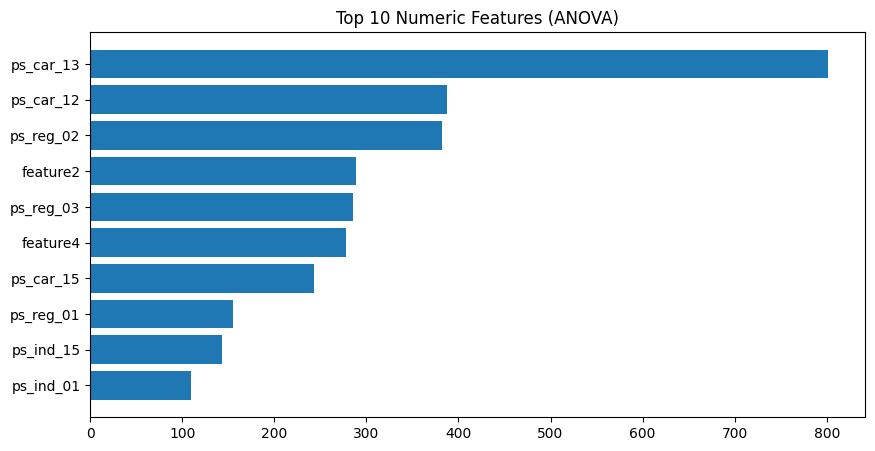

In [24]:
plt.figure(figsize=(10,5))
plt.barh(anova_scores['Feature'].head(10), anova_scores['F_Score'].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Numeric Features (ANOVA)")
plt.show()

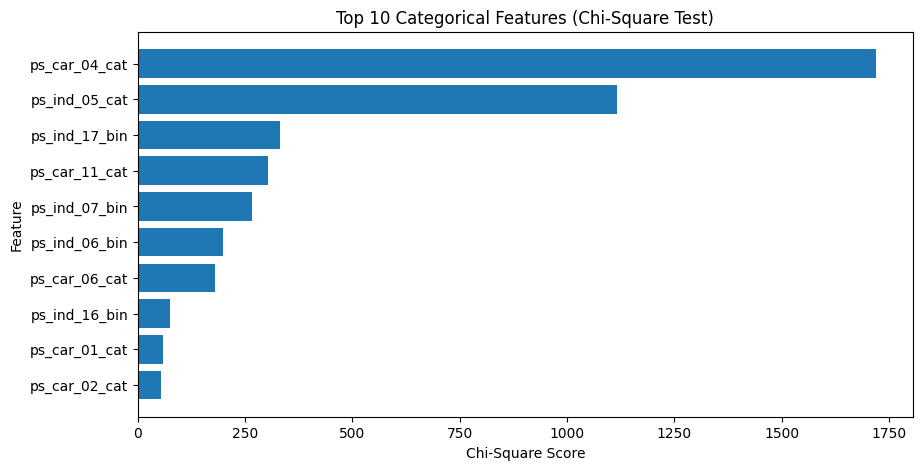

In [31]:
plt.figure(figsize=(10,5))
plt.barh(chi_scores['Feature'].head(10), chi_scores['Chi2_Score'].head(10))
plt.gca().invert_yaxis()
plt.title("Top 10 Categorical Features (Chi-Square Test)")
plt.xlabel("Chi-Square Score")
plt.ylabel("Feature")
plt.show()


In [44]:
print("\n" + "-"*80)
print("Training model with filter-selected features...")

X_train_filter = X_train[selected_features]
X_val_filter = X_val[selected_features]

dt_filter = DecisionTreeClassifier(random_state=ERP_ID)
dt_filter.fit(X_train_filter, y_train)

y_val_proba_filter = dt_filter.predict_proba(X_val_filter)[:, 1]
filter_auroc = roc_auc_score(y_val, y_val_proba_filter)

print(f"\nValidation AUROC with Filter Selection: {filter_auroc:.8f}")
print(f"Baseline AUROC: {baseline_auroc:.8f}")
print(f"Improvement: {(filter_auroc - baseline_auroc):.8f}")

print("\n✓ Filter-based feature selection complete!")


--------------------------------------------------------------------------------
Training model with filter-selected features...

Validation AUROC with Filter Selection: 0.50738481
Baseline AUROC: 0.50862471
Improvement: -0.00123990

✓ Filter-based feature selection complete!


In [38]:
from sklearn.feature_selection import SequentialFeatureSelector

n_features_to_select = min(15, len(all_features) // 3)

print(f"\nSearching for best {n_features_to_select} features...")
print("This may take a few minutes...\n")

# Initialize base estimator
base_dt = DecisionTreeClassifier(random_state=ERP_ID, max_depth=10)

# Forward selection
forward_selector = SequentialFeatureSelector(
    base_dt,
    n_features_to_select=n_features_to_select,
    direction='forward',
    scoring='roc_auc',
    cv=3,  # 3-fold CV for speed
    n_jobs=-1  # Use all cores
)

# Fit forward selector
forward_selector.fit(X_train, y_train)

# Get selected features
forward_features = X_train.columns[forward_selector.get_support()].tolist()

print("="*80)
print("FORWARD SELECTION RESULTS")
print("="*80)

print(f"\nSelected {len(forward_features)} features:")
for i, feat in enumerate(forward_features, 1):
    print(f"{i:2d}. {feat}")

# ============================================================================
# EVALUATE FORWARD SELECTION
# ============================================================================
print("\n" + "-"*80)
print("Evaluating forward-selected features...")

X_train_forward = X_train[forward_features]
X_val_forward = X_val[forward_features]

dt_forward = DecisionTreeClassifier(random_state=ERP_ID)
dt_forward.fit(X_train_forward, y_train)

y_val_proba_forward = dt_forward.predict_proba(X_val_forward)[:, 1]
forward_auroc = roc_auc_score(y_val, y_val_proba_forward)

print(f"\nValidation AUROC with Forward Selection: {forward_auroc:.8f}")
print(f"Filter Selection AUROC: {filter_auroc:.8f}")
print(f"Baseline AUROC: {baseline_auroc:.8f}")
print(f"Improvement over Baseline: {(forward_auroc - baseline_auroc):.8f}")

print("\n✓ Forward feature selection complete!")


Searching for best 15 features...
This may take a few minutes...

FORWARD SELECTION RESULTS

Selected 15 features:
 1. ps_ind_02_cat
 2. ps_ind_05_cat
 3. ps_car_04_cat
 4. ps_car_08_cat
 5. ps_car_10_cat
 6. ps_ind_03
 7. ps_ind_06_bin
 8. ps_ind_11_bin
 9. ps_ind_12_bin
10. ps_ind_13_bin
11. ps_ind_14
12. ps_ind_16_bin
13. ps_ind_17_bin
14. ps_car_13
15. ps_calc_15_bin

--------------------------------------------------------------------------------
Evaluating forward-selected features...

Validation AUROC with Forward Selection: 0.50485325
Filter Selection AUROC: 0.50738481
Baseline AUROC: 0.50862471
Improvement over Baseline: -0.00377146

✓ Forward feature selection complete!


In [45]:
print("="*80)
print("BACKWARD FEATURE ELIMINATION")
print("="*80)

# Start with filter-selected features to reduce computation time
# Backward elimination from all features would be too slow
print(f"\nStarting with {len(selected_features)} filter-selected features")
print(f"Eliminating down to {n_features_to_select} features...")
print("This may take a few minutes...\n")

X_train_for_backward = X_train[selected_features]
X_val_for_backward = X_val[selected_features]

# Initialize base estimator
base_dt_backward = DecisionTreeClassifier(random_state=ERP_ID, max_depth=10)

# Backward elimination
backward_selector = SequentialFeatureSelector(
    base_dt_backward,
    n_features_to_select=n_features_to_select,
    direction='backward',
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

# Fit backward selector
backward_selector.fit(X_train_for_backward, y_train)

# Get selected features
backward_features_mask = backward_selector.get_support()
backward_features = [selected_features[i] for i, mask in enumerate(backward_features_mask) if mask]

print("="*80)
print("BACKWARD ELIMINATION RESULTS")
print("="*80)

print(f"\nSelected {len(backward_features)} features:")
for i, feat in enumerate(backward_features, 1):
    print(f"{i:2d}. {feat}")

# ============================================================================
# EVALUATE BACKWARD ELIMINATION
# ============================================================================
print("\n" + "-"*80)
print("Evaluating backward-eliminated features...")

X_train_backward = X_train[backward_features]
X_val_backward = X_val[backward_features]

dt_backward = DecisionTreeClassifier(random_state=ERP_ID)
dt_backward.fit(X_train_backward, y_train)

y_val_proba_backward = dt_backward.predict_proba(X_val_backward)[:, 1]
backward_auroc = roc_auc_score(y_val, y_val_proba_backward)

print(f"\nValidation AUROC with Backward Elimination: {backward_auroc:.8f}")
print(f"Forward Selection AUROC: {forward_auroc:.8f}")
print(f"Filter Selection AUROC: {filter_auroc:.8f}")
print(f"Baseline AUROC: {baseline_auroc:.8f}")


print("\n" + "="*80)
print("FEATURE SELECTION COMPARISON")
print("="*80)

comparison = pd.DataFrame({
    'Method': ['Baseline (All Features)', 'Filter Selection', 'Forward Selection', 'Backward Elimination'],
    'Num Features': [len(all_features), len(selected_features), len(forward_features), len(backward_features)],
    'Val AUROC': [baseline_auroc, filter_auroc, forward_auroc, backward_auroc]
})

comparison['Improvement'] = comparison['Val AUROC'] - baseline_auroc
comparison = comparison.sort_values('Val AUROC', ascending=False)

print("\n", comparison.to_string(index=False))

# Choose best feature set
best_method_idx = comparison['Val AUROC'].idxmax()
best_method = comparison.loc[best_method_idx, 'Method']

print(f"\n✓ Best method so far: {best_method}")
print("✓ Backward elimination complete!")

BACKWARD FEATURE ELIMINATION

Starting with 30 filter-selected features
Eliminating down to 15 features...
This may take a few minutes...

BACKWARD ELIMINATION RESULTS

Selected 15 features:
 1. ps_car_13
 2. ps_car_12
 3. feature2
 4. ps_reg_03
 5. feature4
 6. ps_reg_01
 7. ps_ind_15
 8. ps_car_14
 9. ps_ind_03
10. ps_car_04_cat
11. ps_ind_05_cat
12. ps_ind_06_bin
13. ps_car_06_cat
14. ps_ind_16_bin
15. ps_ind_09_bin

--------------------------------------------------------------------------------
Evaluating backward-eliminated features...

Validation AUROC with Backward Elimination: 0.50488478
Forward Selection AUROC: 0.50485325
Filter Selection AUROC: 0.50738481
Baseline AUROC: 0.50862471

FEATURE SELECTION COMPARISON

                  Method  Num Features  Val AUROC  Improvement
Baseline (All Features)            61   0.508625     0.000000
       Filter Selection            30   0.507385    -0.001240
   Backward Elimination            15   0.504885    -0.003740
      Forward Sele


Standardizing features...

Applying PCA...

Total original features: 220
Components for 90% variance: 156
Variance explained by 156 components: 0.90200957

--------------------------------------------------------------------------------
Variance Explained:
PC  1: 0.02938720 (0.02938720)
PC  2: 0.04755488 (0.01816768)
PC  3: 0.06383614 (0.01628127)
PC  4: 0.07733491 (0.01349877)
PC  5: 0.09029615 (0.01296124)
PC  6: 0.10260598 (0.01230983)
PC  7: 0.11408790 (0.01148192)
PC  8: 0.12531931 (0.01123141)
PC  9: 0.13599093 (0.01067162)
PC 10: 0.14657117 (0.01058023)
PC 11: 0.15677863 (0.01020746)
PC 12: 0.16682050 (0.01004188)
PC 13: 0.17679021 (0.00996971)
PC 14: 0.18625332 (0.00946311)
PC 15: 0.19560010 (0.00934679)
PC 16: 0.20471766 (0.00911756)
PC 17: 0.21371132 (0.00899365)
PC 18: 0.22263904 (0.00892772)
PC 19: 0.23136071 (0.00872167)
PC 20: 0.23992779 (0.00856709)

✓ Plot saved as 'pca_variance_explained.png'


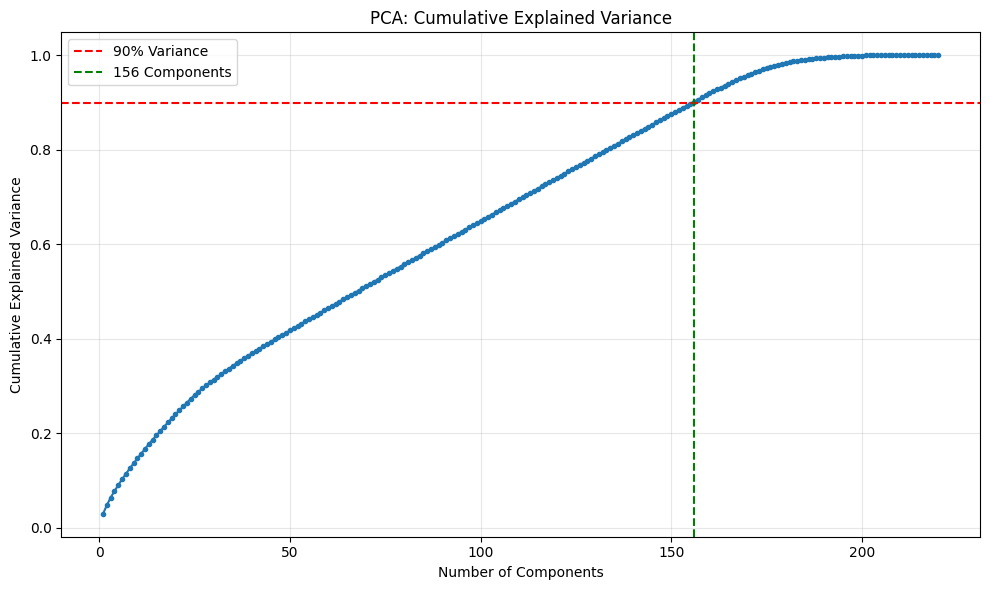


--------------------------------------------------------------------------------
Transforming data with 156 components...
Transformed training shape: (207346, 156)
Transformed validation shape: (88863, 156)

--------------------------------------------------------------------------------
Training model with PCA features...

Validation AUROC with PCA: 0.50726016
Backward Elimination AUROC: 0.50488478
Forward Selection AUROC: 0.50485325
Baseline AUROC: 0.50862471

PCA SUMMARY
✓ Components for 90% variance: 156
✓ Dimensionality reduction: 220 → 156
✓ Reduction: 29.09090909%
✓ PCA AUROC: 0.507260156


In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(
    X2, y2, 
    test_size=0.30, 
    random_state=ERP_ID,
    stratify=y2  # Maintain class distribution
)
print("\nStandardizing features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_val_scaled = scaler.transform(X_val_pca)


print("\nApplying PCA...")

# Fit PCA with all components to see variance explained
pca_full = PCA(random_state=ERP_ID)
pca_full.fit(X_train_scaled)

# Calculate cumulative variance explained
cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components for 90% variance
n_components_90 = np.argmax(cumsum_variance >= 0.90) + 1

print(f"\nTotal original features: {X_train_pca.shape[1]}")
print(f"Components for 90% variance: {n_components_90}")
print(f"Variance explained by {n_components_90} components: {cumsum_variance[n_components_90-1]:.8f}")

# ============================================================================
# VARIANCE EXPLAINED VISUALIZATION
# ============================================================================
print("\n" + "-"*80)
print("Variance Explained:")

# Show first 20 components
for i in range(min(20, len(cumsum_variance))):
    print(f"PC {i+1:2d}: {cumsum_variance[i]:.8f} ({pca_full.explained_variance_ratio_[i]:.8f})")

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, marker='o', linestyle='-', markersize=3)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=n_components_90, color='g', linestyle='--', label=f'{n_components_90} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_variance_explained.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'pca_variance_explained.png'")
plt.show()

# ============================================================================
# TRANSFORM DATA WITH 90% VARIANCE COMPONENTS
# ============================================================================
print("\n" + "-"*80)
print(f"Transforming data with {n_components_90} components...")

pca = PCA(n_components=n_components_90, random_state=ERP_ID)
X_train_pca1 = pca.fit_transform(X_train_scaled)
X_val_pca1 = pca.transform(X_val_scaled)

print(f"Transformed training shape: {X_train_pca1.shape}")
print(f"Transformed validation shape: {X_val_pca1.shape}")

# ============================================================================
# EVALUATE MODEL WITH PCA FEATURES
# ============================================================================
print("\n" + "-"*80)
print("Training model with PCA features...")

dt_pca = DecisionTreeClassifier(random_state=ERP_ID)
dt_pca.fit(X_train_pca1, y_train_pca)

y_val_proba_pca = dt_pca.predict_proba(X_val_pca1)[:, 1]
pca_auroc = roc_auc_score(y_val_pca, y_val_proba_pca)

print(f"\nValidation AUROC with PCA: {pca_auroc:.8f}")
print(f"Backward Elimination AUROC: {backward_auroc:.8f}")
print(f"Forward Selection AUROC: {forward_auroc:.8f}")
print(f"Baseline AUROC: {baseline_auroc:.8f}")

print("\n" + "="*80)
print("PCA SUMMARY")
print("="*80)
print(f"✓ Components for 90% variance: {n_components_90}")
print(f"✓ Dimensionality reduction: {X_train_pca.shape[1]} → {n_components_90}")
print(f"✓ Reduction: {(1 - n_components_90/X_train_pca.shape[1])*100:.8f}%")
print(f"✓ PCA AUROC: {pca_auroc:.9f}")


In [47]:
from sklearn.model_selection import GridSearchCV

print("="*80)
print("HYPERPARAMETER TUNING")
print("="*80)

# Choose the best performing feature set so far
feature_sets = {
    'All Features': (X_train, X_val),
    'Filter Selection': (X_train[selected_features], X_val[selected_features]),
    'Forward Selection': (X_train[forward_features], X_val[forward_features]),
    'Backward Elimination': (X_train[backward_features], X_val[backward_features]),
}

aurocs = {
    'All Features': baseline_auroc,
    'Filter Selection': filter_auroc,
    'Forward Selection': forward_auroc,
    'Backward Elimination': backward_auroc,
}

best_feature_method = max(aurocs, key=aurocs.get)
X_train_best, X_val_best = feature_sets[best_feature_method]

print(f"\nUsing feature set: {best_feature_method}")
print(f"Number of features: {X_train_best.shape[1]}")
print(f"Current AUROC: {aurocs[best_feature_method]:.4f}")

# ============================================================================
# DEFINE HYPERPARAMETER GRID
# ============================================================================
print("\n" + "-"*80)
print("Defining hyperparameter grid...")

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

print("\nParameter grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

total_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"\nTotal combinations: {total_combinations}")

# ============================================================================
# RUN GRIDSEARCHCV
# ============================================================================
print("\n" + "-"*80)
print("Running GridSearchCV with 5-fold cross-validation...")
print("This will take several minutes...\n")

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=ERP_ID),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_best, y_train)

print("\n" + "="*80)
print("GRID SEARCH RESULTS")
print("="*80)

print("\nBest Parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation AUROC: {grid_search.best_score_:.4f}")

# ============================================================================
# EVALUATE BEST MODEL ON VALIDATION SET
# ============================================================================
print("\n" + "-"*80)
print("Evaluating best model on validation set...")

best_model = grid_search.best_estimator_
y_val_proba_tuned = best_model.predict_proba(X_val_best)[:, 1]
tuned_auroc = roc_auc_score(y_val, y_val_proba_tuned)

print(f"\nValidation AUROC (Tuned): {tuned_auroc:.4f}")
print(f"Before Tuning: {aurocs[best_feature_method]:.4f}")
print(f"Improvement: {(tuned_auroc - aurocs[best_feature_method]):.4f}")

# ============================================================================
# TOP 10 HYPERPARAMETER COMBINATIONS
# ============================================================================
print("\n" + "-"*80)
print("Top 10 Hyperparameter Combinations:")

results_df = pd.DataFrame(grid_search.cv_results_)
top_10 = results_df.nlargest(10, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]

for idx, row in top_10.iterrows():
    print(f"\n{idx+1}. AUROC: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})")
    print(f"   Params: {row['params']}")

print("\n✓ Hyperparameter tuning complete!")
print(f"✓ Best tuned AUROC: {tuned_auroc:.4f}")

HYPERPARAMETER TUNING

Using feature set: All Features
Number of features: 61
Current AUROC: 0.5086

--------------------------------------------------------------------------------
Defining hyperparameter grid...

Parameter grid:
  max_depth: [5, 10, 15, 20, None]
  min_samples_split: [2, 5, 10, 20]
  min_samples_leaf: [1, 2, 4, 8]
  criterion: ['gini', 'entropy']
  class_weight: [None, 'balanced']

Total combinations: 320

--------------------------------------------------------------------------------
Running GridSearchCV with 5-fold cross-validation...
This will take several minutes...

Fitting 5 folds for each of 320 candidates, totalling 1600 fits

GRID SEARCH RESULTS

Best Parameters:
  class_weight: None
  criterion: entropy
  max_depth: 5
  min_samples_leaf: 8
  min_samples_split: 2

Best Cross-Validation AUROC: 0.5993

--------------------------------------------------------------------------------
Evaluating best model on validation set...

Validation AUROC (Tuned): 0.5956
B

FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
33. ps_car_13                      : 0.357348
 3. ps_ind_05_cat                  : 0.149539
26. ps_ind_17_bin                  : 0.095804
14. ps_ind_03                      : 0.085896
29. ps_reg_02                      : 0.082917
24. ps_ind_15                      : 0.063667
56. feature2                       : 0.029888
30. ps_reg_03                      : 0.024586
16. ps_ind_07_bin                  : 0.023705
 8. ps_car_07_cat                  : 0.018307

--------------------------------------------------------------------------------
Top 10 features capture: 93.17% of total importance

--------------------------------------------------------------------------------
Creating visualizations...
✓ Saved 'feature_importance_top20.png'


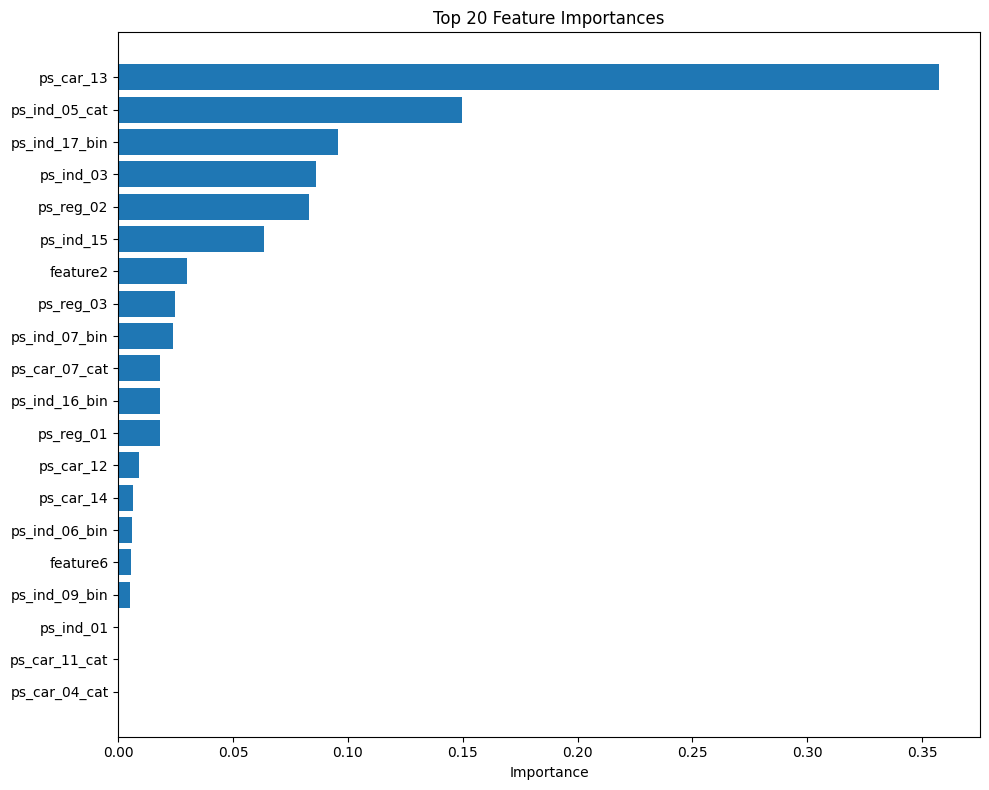

✓ Saved 'cumulative_importance.png'


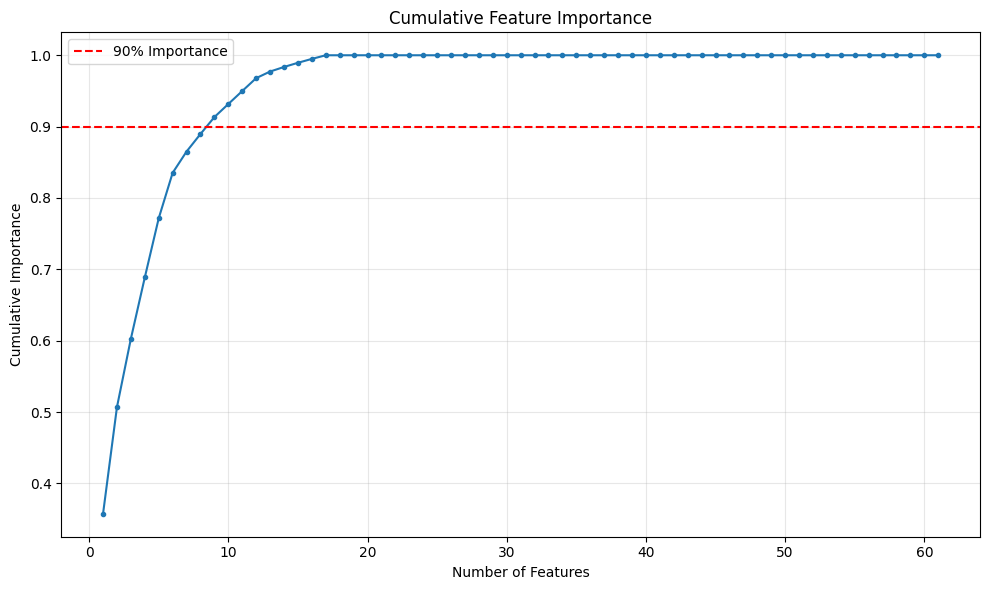


9 features capture 90% of total importance

FEATURE IMPORTANCE INSIGHTS

1. Most important feature: ps_car_13
   Importance: 0.357348

2. Top 3 features account for: 60.27%
   Top 5 features account for: 77.15%
   Top 10 features account for: 93.17%

3. Zero importance features: 44

✓ Feature importance analysis complete!


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


print("="*80)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*80)

# Get feature importances from best tuned model
feature_importances = best_model.feature_importances_
feature_names = X_train_best.columns.tolist()

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# ============================================================================
# TOP 10 IMPORTANT FEATURES
# ============================================================================
print("\nTop 10 Most Important Features:")
print("="*80)

top_10_features = importance_df.head(10)
for idx, row in top_10_features.iterrows():
    print(f"{row.name+1:2d}. {row['Feature']:30s} : {row['Importance']:.6f}")

# Calculate cumulative importance
importance_df['Cumulative_Importance'] = importance_df['Importance'].cumsum()

print("\n" + "-"*80)
print(f"Top 10 features capture: {top_10_features['Importance'].sum():.2%} of total importance")

# ============================================================================
# VISUALIZE FEATURE IMPORTANCE
# ============================================================================
print("\n" + "-"*80)
print("Creating visualizations...")

# Plot 1: Top 20 Feature Importances
plt.figure(figsize=(10, 8))
top_20 = importance_df.head(20)
plt.barh(range(len(top_20)), top_20['Importance'])
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_top20.png', dpi=300, bbox_inches='tight')
print("✓ Saved 'feature_importance_top20.png'")
plt.show()

# Plot 2: Cumulative Importance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(importance_df) + 1), importance_df['Cumulative_Importance'], marker='o', markersize=3)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cumulative_importance.png', dpi=300, bbox_inches='tight')
print("✓ Saved 'cumulative_importance.png'")
plt.show()

# Find number of features for 90% importance
n_features_90_importance = np.argmax(importance_df['Cumulative_Importance'] >= 0.90) + 1
print(f"\n{n_features_90_importance} features capture 90% of total importance")

# ============================================================================
# INSIGHTS
# ============================================================================
print("\n" + "="*80)
print("FEATURE IMPORTANCE INSIGHTS")
print("="*80)

print(f"\n1. Most important feature: {importance_df.iloc[0]['Feature']}")
print(f"   Importance: {importance_df.iloc[0]['Importance']:.6f}")

print(f"\n2. Top 3 features account for: {importance_df.head(3)['Importance'].sum():.2%}")
print(f"   Top 5 features account for: {importance_df.head(5)['Importance'].sum():.2%}")
print(f"   Top 10 features account for: {top_10_features['Importance'].sum():.2%}")

print(f"\n3. Zero importance features: {(importance_df['Importance'] == 0).sum()}")

print("\n✓ Feature importance analysis complete!")

FINAL PERFORMANCE SUMMARY

                              Stage  Num Features  Val AUROC  Improvement  Improvement %
        1. Baseline (All Features)            61   0.508625     0.000000           0.00
2. Filter Selection (ANOVA + Chi²)            30   0.507385    -0.001240          -0.24
              3. Forward Selection            15   0.504853    -0.003771          -0.74
           4. Backward Elimination            15   0.504885    -0.003740          -0.74
             5. PCA (90% Variance)           156   0.507260    -0.001365          -0.27
         6. Best Features + Tuning            61   0.595565     0.086940          17.09

KEY FINDINGS

1. BASELINE PERFORMANCE
   - Starting AUROC: 0.5086
   - Features used: 61

2. FEATURE SELECTION
   - Best method: All Features
   - Features selected: 61
   - Feature reduction: 0.0%

3. DIMENSIONALITY REDUCTION (PCA)
   - Components for 90% variance: 156
   - PCA AUROC: 0.5073

4. HYPERPARAMETER TUNING
   - Best max_depth: 5
   - Best mi

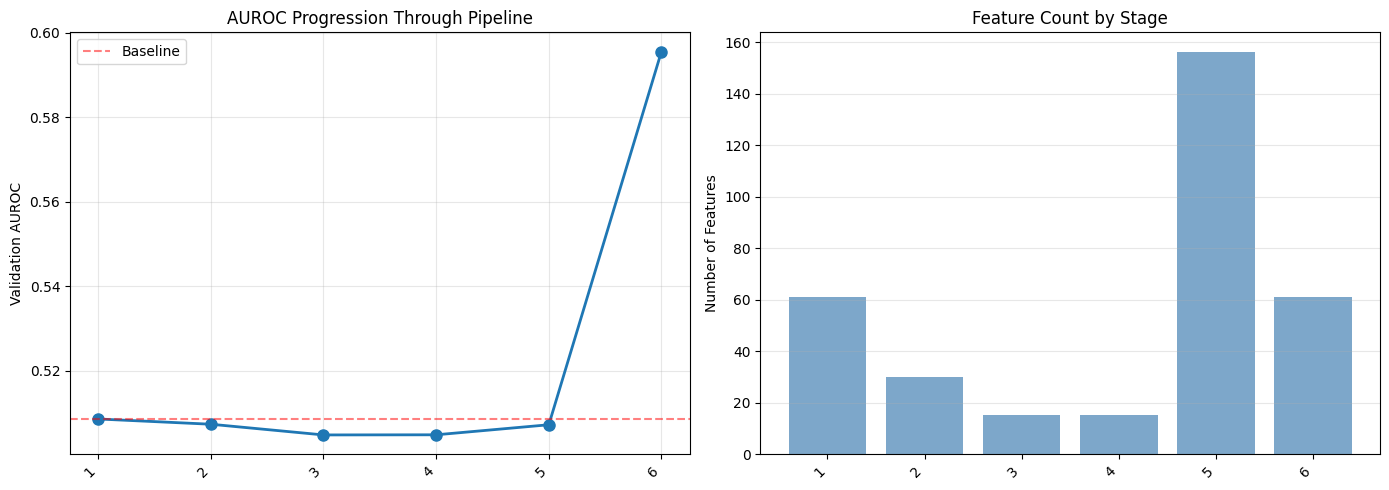


SAVING RESULTS
✓ performance_summary.csv
✓ feature_importance.csv
✓ best_model_params.txt

✓ ALL TASKS COMPLETE!

You now have:
  • Trained and tuned Decision Tree model
  • Performance metrics at each stage
  • Feature importance analysis
  • Visualizations for your report
  • CSV files with detailed results

Use these materials to write your Report 1!


In [50]:
print("="*80)
print("FINAL PERFORMANCE SUMMARY")
print("="*80)

summary = pd.DataFrame({
    'Stage': [
        '1. Baseline (All Features)',
        '2. Filter Selection (ANOVA + Chi²)',
        '3. Forward Selection',
        '4. Backward Elimination',
        '5. PCA (90% Variance)',
        '6. Best Features + Tuning'
    ],
    'Num Features': [
        len(all_features),
        len(selected_features),
        len(forward_features),
        len(backward_features),
        n_components_90,
        X_train_best.shape[1]
    ],
    'Val AUROC': [
        baseline_auroc,
        filter_auroc,
        forward_auroc,
        backward_auroc,
        pca_auroc,
        tuned_auroc
    ]
})

summary['Improvement'] = summary['Val AUROC'] - baseline_auroc
summary['Improvement %'] = (summary['Improvement'] / baseline_auroc * 100).round(2)

print("\n", summary.to_string(index=False))

# ============================================================================
# KEY FINDINGS
# ============================================================================
print("\n" + "="*80)
print("KEY FINDINGS")
print("="*80)

print(f"\n1. BASELINE PERFORMANCE")
print(f"   - Starting AUROC: {baseline_auroc:.4f}")
print(f"   - Features used: {len(all_features)}")

print(f"\n2. FEATURE SELECTION")
print(f"   - Best method: {best_feature_method}")
print(f"   - Features selected: {X_train_best.shape[1]}")
print(f"   - Feature reduction: {(1 - X_train_best.shape[1]/len(all_features))*100:.1f}%")

print(f"\n3. DIMENSIONALITY REDUCTION (PCA)")
print(f"   - Components for 90% variance: {n_components_90}")
print(f"   - PCA AUROC: {pca_auroc:.4f}")

print(f"\n4. HYPERPARAMETER TUNING")
print(f"   - Best max_depth: {best_model.max_depth}")
print(f"   - Best min_samples_split: {best_model.min_samples_split}")
print(f"   - Best min_samples_leaf: {best_model.min_samples_leaf}")
print(f"   - Best criterion: {best_model.criterion}")
print(f"   - Class weight: {best_model.class_weight}")

print(f"\n5. FINAL PERFORMANCE")
print(f"   - Final AUROC: {tuned_auroc:.4f}")
print(f"   - Total improvement: {(tuned_auroc - baseline_auroc):.4f} ({((tuned_auroc - baseline_auroc)/baseline_auroc*100):.2f}%)")
print(f"   - Model complexity: {best_model.get_n_leaves()} leaves, {best_model.tree_.node_count} nodes")

print(f"\n6. TOP 10 IMPORTANT FEATURES")
for i, row in top_10_features.iterrows():
    print(f"   {i+1:2d}. {row['Feature']:30s} ({row['Importance']:.4f})")

# ============================================================================
# GENERATE VISUALIZATIONS SUMMARY
# ============================================================================
print("\n" + "="*80)
print("VISUALIZATION SUMMARY")
print("="*80)
print("\nGenerated plots:")
print("✓ pca_variance_explained.png - PCA variance analysis")
print("✓ feature_importance_top20.png - Top 20 features")
print("✓ cumulative_importance.png - Cumulative feature importance")

# Create final comparison plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: AUROC Progression
axes[0].plot(summary.index, summary['Val AUROC'], marker='o', linewidth=2, markersize=8)
axes[0].set_xticks(summary.index)
axes[0].set_xticklabels([s.split('.')[0] for s in summary['Stage']], rotation=45, ha='right')
axes[0].set_ylabel('Validation AUROC')
axes[0].set_title('AUROC Progression Through Pipeline')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=baseline_auroc, color='r', linestyle='--', alpha=0.5, label='Baseline')
axes[0].legend()

# Plot 2: Feature Count
axes[1].bar(summary.index, summary['Num Features'], color='steelblue', alpha=0.7)
axes[1].set_xticks(summary.index)
axes[1].set_xticklabels([s.split('.')[0] for s in summary['Stage']], rotation=45, ha='right')
axes[1].set_ylabel('Number of Features')
axes[1].set_title('Feature Count by Stage')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('pipeline_summary.png', dpi=300, bbox_inches='tight')
print("✓ pipeline_summary.png - Overall pipeline comparison")
plt.show()

# ============================================================================
# SAVE RESULTS TO FILE
# ============================================================================
print("\n" + "="*80)
print("SAVING RESULTS")
print("="*80)

# Save summary to CSV
summary.to_csv('performance_summary.csv', index=False)
print("✓ performance_summary.csv")

# Save feature importance
importance_df.to_csv('feature_importance.csv', index=False)
print("✓ feature_importance.csv")

# Save best model parameters
with open('best_model_params.txt', 'w') as f:
    f.write(f"ERP ID (Random State): {ERP_ID}\n")
    f.write(f"\nBest Feature Selection Method: {best_feature_method}\n")
    f.write(f"Number of Features: {X_train_best.shape[1]}\n")
    f.write(f"\nBest Hyperparameters:\n")
    for param, value in grid_search.best_params_.items():
        f.write(f"  {param}: {value}\n")
    f.write(f"\nFinal Validation AUROC: {tuned_auroc:.4f}\n")
    f.write(f"Improvement over Baseline: {(tuned_auroc - baseline_auroc):.4f}\n")
print("✓ best_model_params.txt")

print("\n" + "="*80)
print("✓ ALL TASKS COMPLETE!")
print("="*80)
print("\nYou now have:")
print("  • Trained and tuned Decision Tree model")
print("  • Performance metrics at each stage")
print("  • Feature importance analysis")
print("  • Visualizations for your report")
print("  • CSV files with detailed results")
print("\nUse these materials to write your Report 1!")